## Bagging & Boosting KNN & Stacking Assignment Q/A

### 1) What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?
#### > **The fundamental idea behind ensemble techniques is**:
- To combine multiple individual models (often called "weak learners") to produce a more accurate, robust, and generalizable final model.
- By aggregating the predictions of several models, ensemble methods reduce variance, bias, or overfitting, depending on the specific technique used.
- Instead of relying on a single model, ensemble methods leverage the “wisdom of the crowd” combining many models to improve performance.
- Mathematically, if each model makes independent errors, averaging or combining them reduces the overall error rate.
### **Bagging**
##### **Approach**:
- Trains multiple models independently in parallel.
-Each model is trained on a random sample (with replacement) of the original dataset (bootstrap samples).
- The final prediction is made by averaging (for regression) or majority voting (for classification).
##### **Objective**:
- To reduce variance and avoid overfitting.
- Works best with high-variance, low-bias models like decision trees.
### **Boosting**
##### **Approach**:
- Trains models sequentially, where each new model focuses on correcting the errors made by the previous ones.
- Misclassified or high-error samples get more weight in subsequent iterations.
- The final prediction is a weighted combination of all models.
##### **Objective**:
- To reduce bias and improve model accuracy by turning weak learners into a strong one.
- Works best with simple, weak models (like shallow trees).

### 2) Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.
#### > A Random Forest Classifier reduces overfitting compared to a single Decision Tree by introducing randomness and averaging in the model-building process.
#### Random Forest Reduces Overfitting in following ways:
- A single decision tree tends to overfit the training data because it tries to perfectly classify all samples, even noisy ones.
- A Random Forest builds multiple decision trees on different subsets of data and features and then averages their predictions.
#### This process:
- Reduces variance (since individual trees errors cancel out).
- Maintains low bias (as each tree is still a strong classifier).
So, the ensemble is less likely to memorize training data and generalizes better to unseen data.
#### **Two Key Hyperparameters that Help Control Overfitting are**:
#### **n_estimators (Number of Trees)**
- More trees - more averaging - smoother and more stable predictions.
- Helps reduce variance, thus reducing overfitting.
- However, after a certain point, adding more trees gives diminishing returns.
#### **max_features (Number of Features Considered per Split)**:
- Controls how many features each tree can use when splitting.
- Introducing randomness in feature selection ensures trees are less correlated.
- Less correlation between trees → better averaging effect → less overfitting.

### 3) What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
#### > Stacking is an ensemble learning technique that combines multiple different types of models (base learners) and uses a meta-model (or blender) to learn how to best combine their predictions.
#### **Stacking Differs from Bagging and Boosting in the folowing ways** :
#### **Bagging**:
- Training data is Randomly sampled subsets (with replacement) and the combination method Averaging or Voting and the goal is to reduce Goal
Reduce variance.
#### **Boosting**:
- Training data is Sequentially trained, focusing on previous errors and combination method is Weighted combination (based on model performance) and the goal is to Reduce bias
#### **Example**:
#### Use Case: Predicting whether a customer will churn.
####  Base Models:
- Decision Tree - captures non-linear relationships

- Logistic Regression - captures linear relationships

- Random Forest - handles feature interactions
### Meta-Model:
- Logistic Regression (trained on predictions from the base models)
Learns which base model performs best for different types of customers.
#### This helps achieve higher accuracy and better generalization than any single model or simple ensemble like bagging/boosting.

### 4) What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?
#### > The OOB score (Out-of-Bag score) is an internal model evaluation metric used in Random Forests to estimate how well the model generalizes — without needing a separate validation or test set.
#### It's Useful because:
### **No Need for a Separate Validation Set** : The OOB score provides an unbiased performance estimate without splitting the dataset, so all data can be used for training.
#### **Automatic Cross-Validation** : It acts like a built-in cross-validation mechanism because each sample is tested on multiple trees that never saw it during training.
### **Efficient Model Evaluation** : Saves computation time and data, especially when the dataset is small.
### **How It Works**:
#### **Bootstrap Sampling**:
- Each decision tree in the Random Forest is trained on a random subset of the training data (sampled with replacement).
- On average, about 63% of the data is used for training each tree, and the remaining 37% of samples are not included in that tree's training data.
#### **Out-of-Bag Samples**:
- The data points not used to train a particular tree are called its out-of-bag (OOB) samples.
#### **OOB Prediction**:
- For each sample, the model's prediction is made using only the trees that did not see that sample during training.
- These predictions are compared with the actual labels to compute the OOB score (similar to accuracy or R², depending on the task).

### 5) Compare AdaBoost and Gradient Boosting in terms of:
- How they handle errors from weak learners
- Weight adjustment mechanism
- Typical use cases
#### > **AdaBoost**
#### **How They Handle Errors from Weak Learners**
- Error Handling Approach : Focuses on misclassified samples — it increases their weights so that the next weak learner focuses more on those difficult cases.
- Base Learner Training : Each learner depends on how the previous learner classified the data (correct vs. incorrect).
#### **Weight Adjustment Mechanism**
- Sample Weights : Increases weights of misclassified samples and decreases weights of correctly classified ones after each iteration.
- Learner Contribution : Each weak learner gets a weight (α) based on its accuracy — better learners get higher influence in final prediction.
#### **Typical Use Cases**
- Best For : Binary and multiclass classification (e.g., spam detection, face recognition).
- Speed and Complexity : Simpler and faster to train; sensitive to noisy data and outliers.
### > **Gradient Boosting**
#### **How They Handle Errors from Weak Learners**
- Error Handling Approach: Focuses on residual errors (prediction differences) — each new weak learner tries to minimize the remaining errors (residuals) from the previous model.
- Base Learner Training : Each learner is trained on the residuals (negative gradients of the loss function).
#### **Weight Adjustment Mechanism**
- Sample Weights: Does not adjust sample weights directly instead, it fits new models to the residual errors.
- Learner Contribution : Each weak learner's contribution is scaled by a learning rate (η) to control how much it corrects the previous errors.
#### **Typical Use Cases**
- Best For : Regression and classification tasks (Example: customer churn prediction, credit risk, time series forecasting).
- Speed and Complexity : More flexible and powerful but computationally heavier.

### 6) Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.
#### > CatBoost (short for Categorical Boosting) is specifically designed to handle categorical features efficiently and automatically, without requiring manual preprocessing like one-hot encoding or label encoding.It achieves this through an innovative encoding method called Target Statistics (or Ordered Target Encoding) that avoids data leakage and overfitting.
#### **Handling of categorical variables**
#### **No Manual Encoding Needed** :
- Traditional models require converting categories into numbers (Example: one-hot encoding), which increases dimensionality and loses relationships between categories.
- CatBoost automatically converts categorical values into numerical representations internally — preserving useful statistical information.
#### **Uses Ordered Target Statistics (Target Encoding Done Right)** : Instead of replacing categories with their mean target value (which causes target leakage), CatBoost uses an ordered approach:
- For each row, it computes an encoding based only on previous samples (as if in time order).
- This ensures the model doesn't "peek" at the true label of the current sample.
#### **Combines Encodings Across Multiple Random Permutations** :
- CatBoost builds multiple random orderings of the dataset and computes encodings for each permutation.
- Averaging across permutations makes the encodings more stable and robust.
#### **Efficient Implementation Inside Decision Trees** :
- These encodings are directly used in tree splits, so the algorithm learns optimal thresholds for categorical features naturally.
- This allows CatBoost to capture complex, non-linear relationships among categories.

### 7) KNN Classifier Assignment: Wine Dataset Analysis with Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.


In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Dataset split completed:")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}\n")

# 3. Train KNN (K=5) without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("=== KNN (Unscaled Data, K=5) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 4. Apply StandardScaler, retrain KNN, and compare
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== KNN (Scaled Data, K=5) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))

# 5. Use GridSearchCV to find best K (1–20) and distance metric
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print("\n=== Grid Search Results ===")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# 6. Train optimized KNN and compare results
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== Optimized KNN (Scaled Data) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Dataset split completed:
Training samples: 124, Testing samples: 54

=== KNN (Unscaled Data, K=5) ===
Accuracy: 0.7222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


=== KNN (Scaled Data, K=5) ===
Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        

### 8) PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

Dataset loaded successfully.
Features: 30, Samples: 569


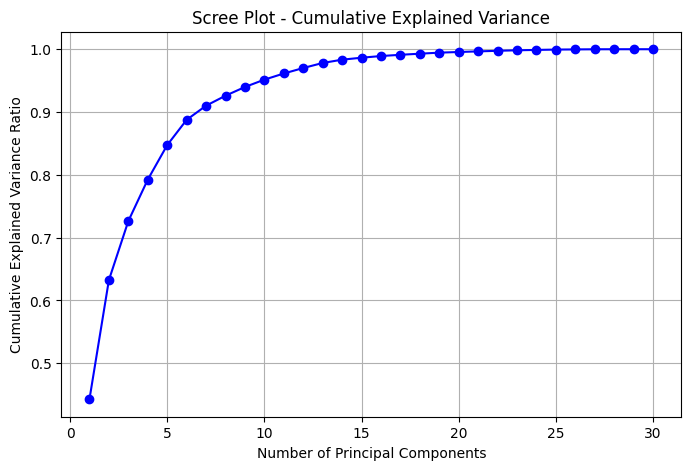


Number of components to retain 95% variance: 10

=== KNN Accuracy Comparison ===
Original Data Accuracy: 0.9708
PCA (95% variance) Data Accuracy: 0.9474


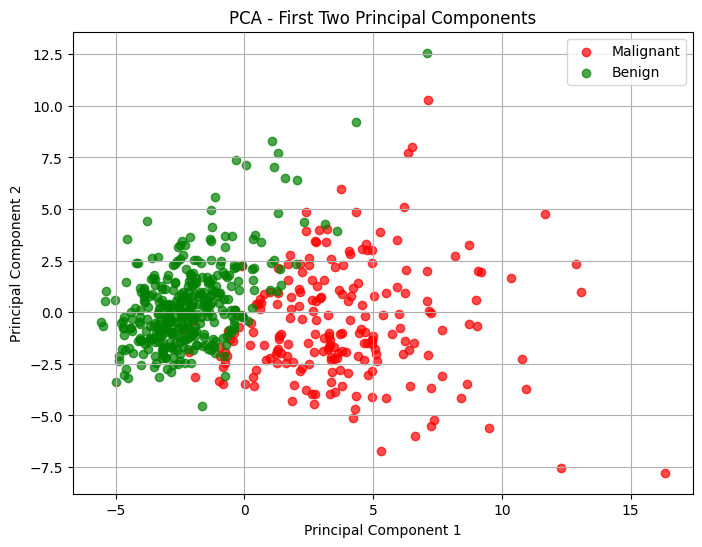

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

print("Dataset loaded successfully.")
print(f"Features: {X.shape[1]}, Samples: {X.shape[0]}")

# Standardize the features (important before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA and plot the scree plot (explained variance ratio)
pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', color='b')
plt.title("Scree Plot - Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.grid(True)
plt.show()

# 3. Retain 95% variance and transform the dataset
pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X_scaled)

print(f"\nNumber of components to retain 95% variance: {pca_95.n_components_}")

# 4. Train KNN on original data and PCA-transformed data, compare accuracy
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
X_pca_train, X_pca_test, _, _ = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# Train KNN on original data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_orig = knn_original.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

# Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)
y_pred_pca = knn_pca.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("\n=== KNN Accuracy Comparison ===")
print(f"Original Data Accuracy: {acc_orig:.4f}")
print(f"PCA (95% variance) Data Accuracy: {acc_pca:.4f}")

# 5. Visualize first two principal components (scatter plot)
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[y == 0, 0], X_2d[y == 0, 1], alpha=0.7, label='Malignant', color='red')
plt.scatter(X_2d[y == 1, 0], X_2d[y == 1, 1], alpha=0.7, label='Benign', color='green')
plt.title("PCA - First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

### 9) :KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


=== KNN Regression (K=5) ===
Euclidean Distance MSE: 4989.2901
Manhattan Distance MSE: 5558.4380


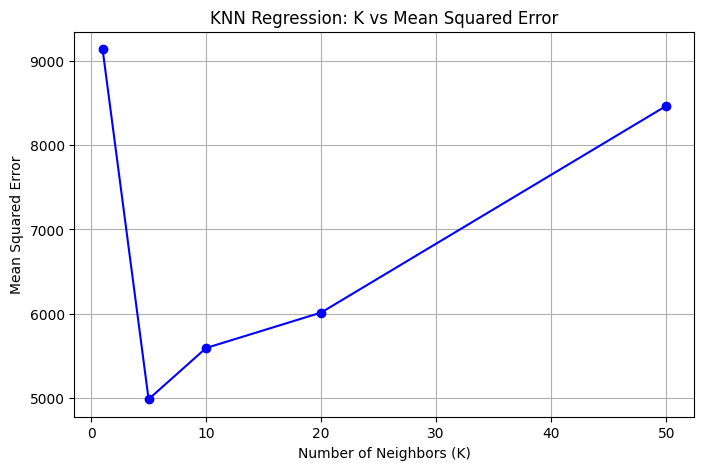


=== K vs. MSE Summary ===
K =  1 --> MSE = 9133.6648
K =  5 --> MSE = 4989.2901
K = 10 --> MSE = 5595.7684
K = 20 --> MSE = 6015.5258
K = 50 --> MSE = 8462.5744


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)

# Split into train/test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardize features (important for distance-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train KNN Regressor with Euclidean and Manhattan distances (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')

# Fit models
knn_euclidean.fit(X_train_scaled, y_train)
knn_manhattan.fit(X_train_scaled, y_train)

# Predict
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)

# Compute Mean Squared Error (MSE)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("=== KNN Regression (K=5) ===")
print(f"Euclidean Distance MSE: {mse_euclidean:.4f}")
print(f"Manhattan Distance MSE: {mse_manhattan:.4f}")

# 3. Analyze bias-variance tradeoff: test different K values
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot K vs. MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o', color='b')
plt.title("KNN Regression: K vs Mean Squared Error")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

# Print results summary
print("\n=== K vs. MSE Summary ===")
for k, mse in zip(k_values, mse_values):
    print(f"K = {k:2d} --> MSE = {mse:.4f}")

### 10) KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).


Dataset head:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

Missing value counts:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                

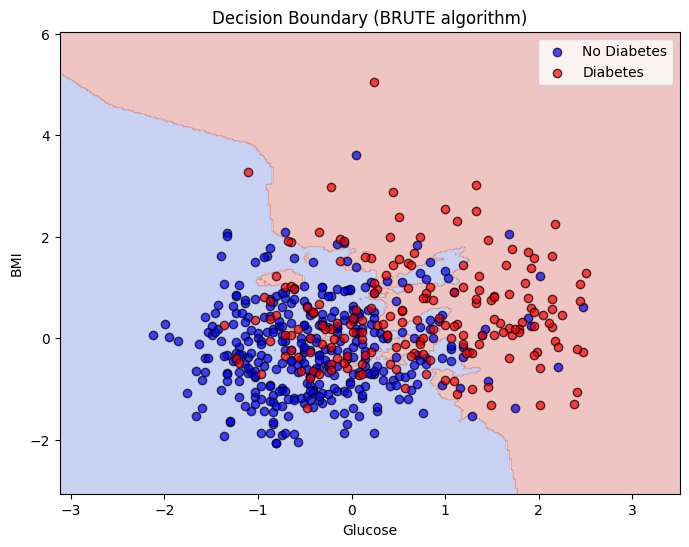

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the dataset from the GitHub URL
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
data = pd.read_csv(url)

print("Dataset head:\n", data.head(), "\n")
print("Missing value counts:\n", data.isna().sum(), "\n")

# 2. Identify missing values
cols_with_zero_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_with_zero_missing:
    if col in data.columns:
        data[col] = data[col].replace(0, np.nan)

print("Missing values after replacing zeros:\n", data.isna().sum(), "\n")

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

print("After imputation – missing counts:\n", data_imputed.isna().sum(), "\n")

# 3. Prepare features & target
X = data_imputed.drop("Outcome", axis=1)
y = data_imputed["Outcome"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# 3a/3b/3c: Train KNN classifier using three algorithms
algorithms = ["brute", "kd_tree", "ball_tree"]
results = {}

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    end = time.time()
    acc = accuracy_score(y_test, y_pred)
    results[algo] = {"accuracy": acc, "time": end - start}
    print(f"--- Algorithm: {algo} ---")
    print(f"Accuracy: {acc:.4f}, Time: {end - start:.4f} sec\n")

print("\nPerformance comparison:\n", pd.DataFrame(results).T)

# 5. Plot decision boundary for best algorithm using top 2 features
feature_names = X.columns.tolist()
top2 = ["Glucose", "BMI"]
if all(f in feature_names for f in top2):
    X2 = data_imputed[top2].values
    X2_scaled = scaler.fit_transform(X2)  # scale these two
    X2_train, X2_test, y2_train, y2_test = train_test_split(
        X2_scaled, y, test_size=0.3, random_state=42, stratify=y
    )
    best_algo = max(results, key=lambda k: results[k]["accuracy"])
    knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
    knn_best.fit(X2_train, y2_train)

    x_min, x_max = X2_train[:, 0].min() - 1, X2_train[:, 0].max() + 1
    y_min, y_max = X2_train[:, 1].min() - 1, X2_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X2_train[y2_train==0, 0], X2_train[y2_train==0, 1], color='blue', label='No Diabetes', edgecolor='k', alpha=0.7)
    plt.scatter(X2_train[y2_train==1, 0], X2_train[y2_train==1, 1], color='red', label='Diabetes', edgecolor='k', alpha=0.7)
    plt.xlabel(top2[0])
    plt.ylabel(top2[1])
    plt.title(f"Decision Boundary ({best_algo.upper()} algorithm)")
    plt.legend()
    plt.show()
else:
    print("Top2 features not found in dataset columns.")